<a href="https://colab.research.google.com/github/CommanderWedgeAntilles/RealEstate/blob/main/Hopeforseniorforever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('kcData.csv')

In [ ]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
X = df[['bedrooms','bathrooms','sqft_living','floors','grade','lat','condition']]#,'zipcode'needs to be broken up into boolean categories
Y = df[['price']]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train = pd.read_csv('drive/My Drive/Senior/Xtrain.csv')
y_train = pd.read_csv('drive/My Drive/Senior/Ytrain.csv')
X_test = pd.read_csv('drive/My Drive/Senior/Xtrain.csv')
y_test = pd.read_csv('drive/My Drive/Senior/Ytrain.csv')

X_test=X_test.drop(['Unnamed: 0'], axis=1)
y_test=y_test.drop(['Unnamed: 0'], axis=1)
X_train=X_train.drop(['Unnamed: 0'], axis=1)
y_train=y_train.drop(['Unnamed: 0'], axis=1)

In [ ]:
model = Sequential()

In [ ]:
model.add(keras.layers.Dense(37, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 37)                370       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2432      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 11,187
Trainable params: 11,187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=[tf.keras.losses.MeanSquaredLogarithmicError()], metrics=['msle','mse'])

In [ ]:
X_test


,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement
0,3,2.50,1760,2.0,0,0,8,1760.0,0
1,4,2.50,1940,2.0,0,0,8,1940.0,0
2,4,1.75,1840,1.0,0,0,7,1090.0,750
3,4,2.50,1910,1.0,0,0,8,1160.0,750
4,4,3.00,2940,2.0,0,1,9,2220.0,720
...,...,...,...,...,...,...,...,...,...
17283,4,1.75,1700,1.0,0,0,8,1700.0,0
17284,2,1.00,710,1.0,0,0,6,710.0,0
17285,2,1.75,1350,2.0,0,0,7,1350.0,0
17286,3,1.75,1820,2.0,0,0,7,1820.0,0


In [ ]:
y_test

,price
0,485000.0
1,390000.0
2,279000.0
3,515000.0
4,870000.0
...,...
17283,616000.0
17284,289000.0
17285,405000.0
17286,299500.0


In [ ]:
model.fit(X_train, y_train, epochs=40, callbacks =[keras.callbacks.EarlyStopping(patience=5)], validation_data=(X_test, y_test), validation_batch_size=4323)#

Epoch 1/40
541/541 [==============================] - 2s 2ms/step - loss: 13.6491 - msle: 13.6491 - mse: 315191050965.4908 - val_loss: 0.1556 - val_msle: 0.1556 - val_mse: 70521307136.0000
Epoch 2/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1561 - msle: 0.1561 - mse: 73869259847.7934 - val_loss: 0.1551 - val_msle: 0.1551 - val_mse: 69045452800.0000
Epoch 3/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1552 - msle: 0.1552 - mse: 71810010157.3432 - val_loss: 0.1552 - val_msle: 0.1552 - val_mse: 68748107776.0000
Epoch 4/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1538 - msle: 0.1538 - mse: 69191087735.0258 - val_loss: 0.1551 - val_msle: 0.1551 - val_mse: 68830904320.0000
Epoch 5/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1526 - msle: 0.1526 - mse: 67681925732.1328 - val_loss: 0.1551 - val_msle: 0.1551 - val_mse: 70146662400.0000
Epoch 6/40
541/541 [==============================] - 1s 2ms/step -

In [ ]:
y_test

,price
0,485000.0
1,390000.0
2,279000.0
3,515000.0
4,870000.0
...,...
17283,616000.0
17284,289000.0
17285,405000.0
17286,299500.0


In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 37)                370       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                2432      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 65        
Total params: 11,187
Trainable params: 11,187
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_data = np.array([4,	1.75,	1840,	1.0,	0,	0,	7,	1090.0,	750])

print(model.predict(test_data.reshape(1,9), batch_size=1))

[[432169.25]]


Epoch 1/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1305 - msle: 0.1305 - mse: 66324021248.0000 - val_loss: 0.1297 - val_msle: 0.1297 - val_mse: 68035547136.0000
Epoch 2/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1303 - msle: 0.1303 - mse: 66064707584.0000 - val_loss: 0.1285 - val_msle: 0.1285 - val_mse: 65018273792.0000
Epoch 3/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1303 - msle: 0.1303 - mse: 66001125376.0000 - val_loss: 0.1326 - val_msle: 0.1326 - val_mse: 69396381696.0000
Epoch 4/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1304 - msle: 0.1304 - mse: 65875345408.0000 - val_loss: 0.1297 - val_msle: 0.1297 - val_mse: 62367277056.0000
Epoch 5/40
541/541 [==============================] - 1s 2ms/step - loss: 0.1301 - msle: 0.1301 - mse: 65723969536.0000 - val_loss: 0.1292 - val_msle: 0.1292 - val_mse: 64429793280.0000
Epoch 6/40
541/541 [==============================] - 1s 2ms/step - lo

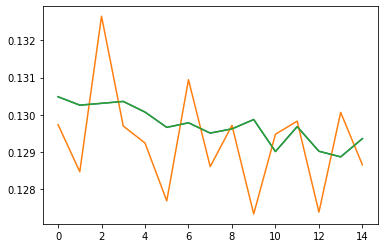

In [ ]:
history = model.fit(X_train, y_train, epochs=40, callbacks =[keras.callbacks.EarlyStopping(patience=5)], validation_data=(X_test, y_test), validation_batch_size=14515)
# plot metrics
plt.plot(history.history['msle'])
plt.plot(history.history['val_msle'])
plt.plot(history.history['loss'])
plt.show()

In [ ]:
model.save('finalFinalModel')

INFO:tensorflow:Assets written to: finalFinalModel/assets


In [ ]:
test_data = np.array([4,	3.00,	2940,	2.0,	0,	1,	9,	2220.0,	720])

print(model.predict(test_data.reshape(1,9), batch_size=1))

[[778122.75]]


In [ ]:
df.isnull().sum()